<p style="font-family: helvetica,arial,sans-serif; font-size:1.8em;color:white; background-color: black; height:28px; ">&emsp;<b>Evaluate Factors Impacting Pedestrian Traffic</b></p>
    
<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; ">&emsp;<b>Authored by: </b>Brendan Richards, Barkha Javed</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black; text-align:right">
<b>Duration:</b> 60 mins&emsp;</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD;">&emsp;<b>Level:</b>Beginner&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Pre-requisite Skills:</b>Python</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Scenario</b>

**As a small business owner, I want to understand how covid affected foot traffic, and how long it might take to return to normal. I'd also like deeper insights into how different activities can impact pedestrian traffic.**

Factors impacting traffic include those listed below, we will be examining some of these in depth:
- Seasonality through temperature, severe weather events,  daylight savings, public holidays such as Christmas, school holidays, 
- Time of day, day of week
- Major events such as the AFL, concerts and exhibitions
- Proximity to public transport: Trains / Buses / Trams
- Number of local residences
- Number of people travelling into the CBD
- Covid cases and status
- Other venues in proximity - schools, universities, parks, retail outlets, restaurants, bars, clubs, cinemas



<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>What this Use Case will teach you</b>

At the end of this use case you will understand how to examine the impact of various factors on pedestrain traffic. 

This means learning how to:

* Load and examine the pedestrian sensor locations
* Load and examine the pedestrian counting system - monthly (counts per hour) dataset
* Load and examine the activities dataset
* Load and examine Covid cases, deaths, vaccinations data
* Examine the impact of factors on pedestrian foot traffic 
* Use visualisations to share results
* Increase understanding of possible factors impacting foot traffic when building predictive models


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>A brief introduction to the datasets used</b>

Briefly about each dataset and intended use 

Need to add descriptions

* Geospatial events data, includes types such as traffic management, sport and recreation, reserved parking, public and  private events
* Covid case data on a cumulative daily count of deaths, confirmed case numbers and people fully vaccinated.


The exploratory data analysis on Covid case data showing initial findings is available, please refer to [compare pedestrian traffic pre Covid to now](https://github.com/Chameleon-company/MOP-Code/blob/barkhaj-branch/datascience/dataanalysis/Other%20EDA/eda_compare_pedestrian_traffic_precovid_to_now.ipynb)

The exploratory data analysis on day and night showing initial findings is available, please refer to [compare pedestrian traffic day night]( https://github.com/Chameleon-company/MOP-Code/blob/barkhaj-branch/datascience/dataanalysis/Other%20EDA/eda_compare_pedestrian_traffic_day_night.ipynb)

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Accessing and Loading data</b>

In [67]:
#Libraries to be installed
##!pip -q is to give less output
!pip -q install sodapy
!pip -q install seaborn
!pip -q install pandas
!pip -q install matplotlib
!pip -q install numpy
!pip -q install nbconvert
!pip -q install keyboard
!pip -q install geopandas
!pip -q install requests

In [66]:
#load libraries
import os
import io
import time
import keyboard
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import requests

import numpy as np
import pandas as pd
from sodapy import Socrata

from IPython.core.display import display, HTML
import geopandas as gpd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

#Socrata client connection
client = Socrata('data.melbourne.vic.gov.au', '9UAGAvkem9fqXDhBLElapjazL', None)


### Load geospatial Event data

In [68]:
#This is a quick way to import the geospatial 'event' data from the CoM repository
activities_url="https://data.melbourne.vic.gov.au/api/geospatial/txcy-uafv?method=export&format=GeoJSON"
activities_gdf=gpd.read_file(activities_url)
activities_gdf.head(5)

start_date                                           location  \
0  2021-09-24T00:00:00  Parliament of Victoria110-160 Spring StreetEAS...   
1  2021-07-09T00:00:00  Metropolitan Hotel263-267 William StreetMELBOU...   
2  2021-10-01T00:00:00            10-16 McKillop StreetMELBOURNE VIC 3000   
3  2021-05-25T00:00:00         407-415 King StreetWEST MELBOURNE VIC 3003   
4  2021-09-03T00:00:00                 39 Clarke StreetSOUTHBANK VIC 3006   

                                         activity_id             end_date  \
0  SS-1087503-0-108974-EHD-Permit Issued-24092021...  2021-10-23T00:00:00   
1  SS-1068957-0-110106-ECZ-Permit Issued-09072021...  2022-01-09T00:00:00   
2  SS-1037764-0-106375-ECZ-Permit Issued-01102021...  2022-04-01T00:00:00   
3  SS-1068090-0-105327-EGA-Permit Issued-25052021...  2022-02-01T00:00:00   
4  SS-1081957-0-110394-ECW-Extension requested-03...  2021-10-29T00:00:00   

      status     source_id                       notes classification  \
0  CONFIRMED  EHD-2021-7/3                    Hoarding     Structures   
1  CONFIRMED   ECZ-2021-19           Construction Zone     Structures   
2  CONFIRMED   ECZ-2020-40           Construction Zone     Structures   
3  CONFIRMED   EGA-2021-32                      Gantry     Structures   
4  Confirmed  ECW-2021-409  ePathway Consent for works     Structures   

                     small_area  \
0                East Melbourne   
1               Melbourne (CBD)   
2               Melbourne (CBD)   
3  West Melbourne (Residential)   
4                     Southbank   

                                            geometry  
0  MULTIPOLYGON (((144.97454 -37.81189, 144.97510...  
1  MULTIPOLYGON (((144.95677 -37.81293, 144.95672...  
2  MULTIPOLYGON (((144.96203 -37.81540, 144.96196...  
3  MULTIPOLYGON (((144.95262 -37.81086, 144.95294...  
4  MULTIPOLYGON (((144.95936 -37.82637, 144.95917...

In [69]:
#Pre-processing of that event dataset
activities_gdf.start_date = pd.to_datetime(activities_gdf.start_date, format='%Y-%m-%d')
activities_gdf.end_date = pd.to_datetime(activities_gdf.end_date, format='%Y-%m-%d')
activities_gdf['start_year'] = activities_gdf.start_date.dt.year
activities_gdf['start_month'] = activities_gdf.start_date.dt.month_name()
activities_gdf['start_mdate'] = activities_gdf.start_date.dt.day
activities_gdf['start_time'] = activities_gdf.start_date.dt.hour
activities_gdf['end_year'] = activities_gdf.end_date.dt.year
activities_gdf['end_month'] = activities_gdf.end_date.dt.month_name()
activities_gdf['end_mdate'] = activities_gdf.end_date.dt.day
activities_gdf['end_time'] = activities_gdf.end_date.dt.hour

activities_gdf = activities_gdf.drop(['location', 'source_id', 'small_area','notes', 'status'], axis=1)

activities_gdf['adjacent'] = activities_gdf['geometry'].buffer(0.0005)
activities_gdf['near'] = activities_gdf['geometry'].buffer(0.001)
activities_gdf[["In","Adjacent","Near"]] = None
activities_gdf[["In","Adjacent","Near"]] = activities_gdf[["In","Adjacent","Near"]].astype('object')


In [70]:
#Different types of event or activity
activities_gdf.classification.unique()

array(['Structures', 'Event', 'Public Event', 'Traffic Management',
       'Reserved Parking', 'Private Event', 'Sport/Recreation'],
      dtype=object)

In [71]:
#look at events that are still current
current_act = activities_gdf[(activities_gdf.classification.isin(['Event','PublicEvent','Sport/Recreation']))
                             &(activities_gdf.end_year >= 2022)]

current_act.head(5)

start_date                                        activity_id   end_date  \
6   2022-03-19  P-6731-3941-3941-8-Reinstatement-190320220000-... 2022-05-01   
67  2022-03-21  P-7222-3951-3951-9-Tentative-210320220700-2903... 2022-03-29   
172 2022-10-31  P-6991-4246-4246-3-Tentative-311020220000-0611... 2022-11-06   
182 2022-10-31  P-6991-4074-4074-9-Tentative-311020220000-0611... 2022-11-06   
192 2023-01-02  P-6773-3952-3952-8-Reinstatement-020120230500-... 2023-03-25   

    classification                                           geometry  \
6            Event  MULTIPOLYGON (((144.97235 -37.81969, 144.97234...   
67           Event  MULTIPOLYGON (((144.97369 -37.81861, 144.97366...   
172          Event  MULTIPOLYGON (((144.97753 -37.81351, 144.97751...   
182          Event  MULTIPOLYGON (((144.97833 -37.81350, 144.97833...   
192          Event  MULTIPOLYGON (((144.97568 -37.81928, 144.97568...   

     start_year start_month  start_mdate  start_time  end_year end_month  \
6          2022       March           19           0      2022       May   
67         2022       March           21           0      2022     March   
172        2022     October           31           0      2022  November   
182        2022     October           31           0      2022  November   
192        2023     January            2           0      2023     March   

     end_mdate  end_time                                           adjacent  \
6            1         0  POLYGON ((144.96894 -37.82028, 144.96868 -37.8...   
67          29         0  POLYGON ((144.97107 -37.81807, 144.97110 -37.8...   
172          6         0  POLYGON ((144.97612 -37.81384, 144.97612 -37.8...   
182          6         0  POLYGON ((144.97751 -37.81414, 144.97751 -37.8...   
192         25         0  POLYGON ((144.97523 -37.81978, 144.97522 -37.8...   

                                                  near    In Adjacent  Near  
6    POLYGON ((144.96888 -37.82078, 144.96867 -37.8...  None     None  None  
67   POLYGON ((144.97107 -37.81757, 144.97108 -37.8...  None     None  None  
172  POLYGON ((144.97588 -37.81339, 144.97589 -37.8...  None     None  None  
182  POLYGON ((144.97702 -37.81403, 144.97702 -37.8...  None     None  None  
192  POLYGON ((144.97506 -37.82025, 144.97497 -37.8...  None     None  None

### Load pedestrian traffic sensor location data

In [72]:
#Pedestrian sensor location data
sensor_data_id = "h57g-5234"
results = client.get(sensor_data_id)
sensor_location = pd.DataFrame.from_records(results)
#sensor_location.head(5)

sensor_location[['latitude', 'longitude']] = sensor_location[['latitude', 'longitude']].astype(float)
sensor_location = sensor_location.drop('location',axis=1)

#View sensor data
sensor_location.info()
sensor_location.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sensor_id           91 non-null     object 
 1   sensor_description  91 non-null     object 
 2   sensor_name         91 non-null     object 
 3   installation_date   91 non-null     object 
 4   status              91 non-null     object 
 5   note                10 non-null     object 
 6   latitude            91 non-null     float64
 7   longitude           91 non-null     float64
 8   direction_1         78 non-null     object 
 9   direction_2         78 non-null     object 
dtypes: float64(2), object(8)
memory usage: 7.2+ KB


sensor_id              sensor_description sensor_name  \
0        16            Australia on Collins    Col270_T   
1        50      Faraday St-Lygon St (West)    Lyg309_T   
2        73  Bourke St - Spencer St (South)    Bou655_T   
3        66             State Library - New       QVN_T   
4        59                Building 80 RMIT      RMIT_T   

         installation_date status  \
0  2009-03-30T00:00:00.000      R   
1  2017-11-30T00:00:00.000      A   
2  2020-10-02T00:00:00.000      I   
3  2020-04-06T00:00:00.000      A   
4  2019-02-13T00:00:00.000      A   

                                          note   latitude   longitude  \
0  Device moved to location ID 53 (22/09/2015) -37.815734  144.965210   
1                                          NaN -37.798082  144.967210   
2                                          NaN -37.816957  144.954154   
3                                          NaN -37.810578  144.964443   
4                                          NaN -37.808256  144.963049   

  direction_1 direction_2  
0         NaN         NaN  
1       South       North  
2        East        West  
3       South       North  
4       South       North

### Load pedestrian traffic hourly counts data

In [73]:
#Pedestrian foot count data 
#Uncomment the below to open data source, download sensor data, and store it as a csv locally.
sensor_data_id = "b2ak-trbp"
#results = client.get(sensor_data_id, limit=7000000)
#ds_traffic = pd.DataFrame.from_records(results)
#ds_traffic.to_csv('sensor_traffic.csv', index=False)

sensor_traffic = pd.read_csv('sensor_traffic.csv')
sensor_traffic.info()

print(f'\nThe shape of dataset is {sensor_traffic.shape}. \n')
print('Below are the first few rows of this dataset: ')
sensor_traffic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463670 entries, 0 to 4463669
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id             int64 
 1   date_time      object
 2   year           int64 
 3   month          object
 4   mdate          int64 
 5   day            object
 6   time           int64 
 7   sensor_id      int64 
 8   sensor_name    object
 9   hourly_counts  int64 
dtypes: int64(6), object(4)
memory usage: 340.6+ MB

The shape of dataset is (4463670, 10). 

Below are the first few rows of this dataset: 


id                date_time  year     month  mdate     day  time  \
0  2887628  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
1  2887629  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
2  2887630  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
3  2887631  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
4  2887632  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
5  2887633  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
6  2887634  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
7  2887635  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
8  2887636  2019-11-01T17:00:00.000  2019  November      1  Friday    17   
9  2887637  2019-11-01T17:00:00.000  2019  November      1  Friday    17   

   sensor_id                    sensor_name  hourly_counts  
0         34           Flinders St-Spark La            300  
1         39                   Alfred Place            604  
2         37                Lygon St (East)            216  
3         40   Lonsdale St-Spring St (West)            627  
4         36                Queen St (West)            774  
5         29  St Kilda Rd-Alexandra Gardens            644  
6         42  Grattan St-Swanston St (West)            453  
7         43   Monash Rd-Swanston St (West)            387  
8         44   Tin Alley-Swanston St (West)             27  
9         35                      Southbank           2691

### Merge sensor and location data

In [74]:
#Add date column
sensor_traffic['date'] = pd.to_datetime(sensor_traffic.date_time).dt.date

#Add day of week column
sensor_traffic['dow'] = pd.to_datetime(sensor_traffic.date_time).dt.day_of_week

#convert sensor_id to integer
sensor_traffic['sensor_id']=sensor_traffic['sensor_id'].astype(int)
sensor_location['sensor_id']=sensor_location['sensor_id'].astype(int)

# Mesh pedestrian sensor location and foot traffic datasets
sensor_ds = pd.merge(sensor_traffic, sensor_location, on='sensor_id')

#Simply using the year to differentiate all the years prior to 2020 as before Covid, and post 2019 Covid traffic to now
sensor_ds['pre2020_hourly_counts'] = np.where(sensor_ds['year']<=2019,sensor_ds['hourly_counts'] , 0)
sensor_ds['post2019_hourly_counts'] = np.where(sensor_ds['year']>2019,sensor_ds['hourly_counts'] , 0)

#Add column for day or night traffic
#Add column for day (5am to 5pm) or night (6pm to 4am) traffic
sensor_ds['day_counts']   = np.where(((sensor_ds['time']>4)  & (sensor_ds['time']<18)),sensor_ds['hourly_counts'] , 0)
sensor_ds['night_counts'] = np.where(sensor_ds['day_counts']==0,sensor_ds['hourly_counts'], 0)

sensor_ds.describe()


id          year         mdate          time     sensor_id  \
count  4.463670e+06  4.463670e+06  4.463670e+06  4.463670e+06  4.463670e+06   
mean   2.232320e+06  2.017230e+03  1.574741e+01  1.146917e+01  2.700226e+01   
std    1.289316e+06  3.551188e+00  8.800020e+00  6.938594e+00  1.951539e+01   
min    1.000000e+00  2.009000e+03  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.115918e+06  2.015000e+03  8.000000e+00  5.000000e+00  1.100000e+01   
50%    2.231836e+06  2.018000e+03  1.600000e+01  1.100000e+01  2.300000e+01   
75%    3.347753e+06  2.020000e+03  2.300000e+01  1.700000e+01  4.100000e+01   
max    4.469141e+06  2.022000e+03  3.100000e+01  2.300000e+01  8.700000e+01   

       hourly_counts           dow      latitude     longitude  \
count   4.463670e+06  4.463670e+06  4.463670e+06  4.463670e+06   
mean    4.951352e+02  2.999995e+00 -3.781345e+01  1.449621e+02   
std     7.509822e+02  2.000015e+00  6.187582e-03  8.531568e-03   
min     0.000000e+00  0.000000e+00 -3.782402e+01  1.449297e+02   
25%     4.300000e+01  1.000000e+00 -3.781874e+01  1.449587e+02   
50%     1.780000e+02  3.000000e+00 -3.781381e+01  1.449651e+02   
75%     6.050000e+02  5.000000e+00 -3.781102e+01  1.449669e+02   
max     1.597900e+04  6.000000e+00 -3.779432e+01  1.449747e+02   

       pre2020_hourly_counts  post2019_hourly_counts    day_counts  \
count           4.463670e+06            4.463670e+06  4.463670e+06   
mean            4.074119e+02            8.772332e+01  3.594659e+02   
std             7.443612e+02            2.852713e+02  7.131327e+02   
min             0.000000e+00            0.000000e+00  0.000000e+00   
25%             0.000000e+00            0.000000e+00  0.000000e+00   
50%             6.200000e+01            0.000000e+00  2.400000e+01   
75%             4.530000e+02            2.400000e+01  3.520000e+02   
max             1.597900e+04            1.443700e+04  1.161200e+04   

       night_counts  
count  4.463670e+06  
mean   1.356693e+02  
std    3.910920e+02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    5.900000e+01  
max    1.597900e+04

### Load Covid dataset and merge with pedestrian traffic

In [78]:
#download covid dataset
url = "https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_Data_Hub_State.csv"
download = requests.get(url).content
df_hub= pd.read_csv(io.StringIO(download.decode('utf-8')))

In [79]:
#look at VIC data
options = ['Victoria']
  
# selecting rows based on condition
ds = df_hub[df_hub['administrative_area_level_2'].isin(options)]
ds_hub = ds[['date','confirmed','deaths','positives','people_vaccinated','people_fully_vaccinated','administrative_area_level_2']]

#log transform - may want to apply to more variables
ds_hub['confirmed_log']=np.log(np.log(ds_hub['confirmed']))

print (ds_hub.head(), '\n')
print (ds_hub.describe(), '\n')
print (ds_hub.info())
print("\nTotal number of missing values is","{:,d}".format(ds_hub.isnull().values.sum()))
print("\nColumn-wise distribution of null values\n",ds_hub.isnull().sum())


          date  confirmed  deaths  positives  people_vaccinated  \
6   2020-01-25          1       0        0.0                  0   
14  2020-01-26          1       0        0.0                  0   
22  2020-01-27          1       0        0.0                  0   
30  2020-01-28          1       0        0.0                  0   
38  2020-01-29          3       0        0.0                  0   

    people_fully_vaccinated administrative_area_level_2  confirmed_log  
6                         0                    Victoria           -inf  
14                        0                    Victoria           -inf  
22                        0                    Victoria           -inf  
30                        0                    Victoria           -inf  
38                        0                    Victoria       0.094048   

          confirmed       deaths     positives  people_vaccinated  \
count  9.700000e+02   970.000000  9.700000e+02       9.700000e+02   
mean   4.650031e+05

In [81]:
#check merge column is of same data type, convert if required
ds_hub['date'] = pd.to_datetime(ds_hub['date'], infer_datetime_format=True)
sensor_ds['date'] = pd.to_datetime(sensor_ds['date'], infer_datetime_format=True)

# Mesh Covid and foot traffic datasets
sensor_covid = pd.merge(sensor_ds, ds_hub, on='date')

#drop columns
ds_hub.info()
sensor_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 6 to 7758
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         970 non-null    datetime64[ns]
 1   confirmed                    970 non-null    int64         
 2   deaths                       970 non-null    int64         
 3   positives                    970 non-null    float64       
 4   people_vaccinated            970 non-null    int64         
 5   people_fully_vaccinated      970 non-null    int64         
 6   administrative_area_level_2  970 non-null    object        
 7   confirmed_log                970 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 68.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4463670 entries, 0 to 4463669
Data columns (total 25 columns):
 #   Column                  Dtype         
---  -

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Examine Datasets </b>

### View Activities, Events by sensor location

In [87]:
#This map just demonstrates the 'geometry', 'adjacent' and 'near' polygons.
#This is so we can compare whether a sensor is inside an event's geometry, adjacent to it, or near to it.

style1 = {'fillColor': 'cyan', 'color': 'cyan'}
style2 = {'fillColor': 'orange', 'color': 'orange'}
style3 = {'fillColor': 'yellow', 'color': 'yellow'}

import folium

#Create a map object centered on Melbourne
map = folium.Map(location=[-37.81216592937499, 
                           144.961812290625], 
                          zoom_start=14)

#Add the current events to the map
folium.GeoJson(data=current_act.geometry, style_function=lambda x:style1).add_to(map)
folium.GeoJson(data=current_act.adjacent, style_function=lambda x:style2).add_to(map)
folium.GeoJson(data=current_act.near, style_function=lambda x:style3).add_to(map)

#Add all sensor locations
location_data = sensor_location
sensor_ds
for i in range(0,len(location_data)):
   folium.Marker(
      location=[location_data.iloc[i]['latitude'], location_data.iloc[i]['longitude']],
      popup=location_data.iloc[i]['sensor_description']
   ).add_to(map)

map

### Examine Pedestrian Traffic by Season, time of day and day of week

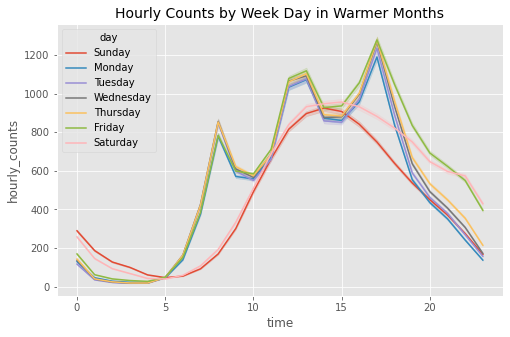

In [98]:
#Plot hourly counts in the warmer months
hue_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(8,5))
axs = sns.lineplot(x='time', y='hourly_counts', hue='day', hue_order = hue_order,
             data = sensor_ds[sensor_ds.month.isin(['September', 'October', 'November', 'December', 'January'
                                                    , 'February', 'March', 'April'])])

axs.set_title('Hourly Counts by Week Day in Warmer Months', size=14)
plt.show()

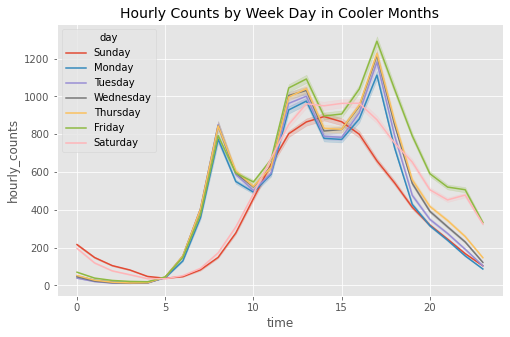

In [97]:
#Plot hourly counts in the cooler months
plt.figure(figsize=(8,5))
axs = sns.lineplot(x='time', y='hourly_counts', hue='day', hue_order = hue_order,
             #not in warmer months
             data = sensor_ds[~sensor_ds.month.isin(['September', 'October', 'November', 'December', 'January'
                                                    , 'February', 'March', 'April'])])
axs.set_title('Hourly Counts by Week Day in Cooler Months', size=14)
plt.show()

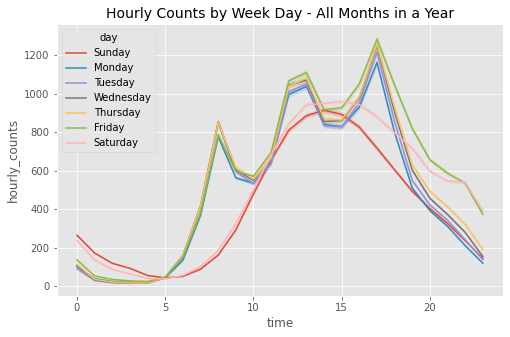

In [96]:
#Counts in all months
plt.figure(figsize=(8,5))
axs = sns.lineplot(x='time', y='hourly_counts', hue = 'day', hue_order = hue_order,
             data = sensor_ds)
axs.set_title('Hourly Counts by Week Day - All Months in a Year', size=14)
plt.show()

### Examine Covid cases, deaths, people fully vaccinated  

### Examine Proximity to public transport

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Examine Datasets </b>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #EEEEEE">&emsp;<b>Congratulations!</b>

You now know a bit more, about some of the factors impacting pdestrian traffic.

Next steps, you may want to explore an indepth interactive [analysis on the impact and effect of events](https://master-mop-busaytgm.ts.gateway.dev/use-cases/event-disruption) such as the AFL, Grand Prix on pedestrian traffic. 

Predicting when pedestrian activity will increase to pre 2020 volumes is a complex task. There are many factors to consider. Hopefully the factors discussed here are useful, and can potentially be included when creating predictive models.

For a closer look at some of the existing datasets and usescases please visit the City of Melbourne Open Data Site. 

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>References</b>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Monthly (counts per hour)', City of Melbourne, date retrieved 11 Aug 2022, <https://dev.socrata.com/foundry/data.melbourne.vic.gov.au/b2ak-trbp>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Sensor Locations', City of Melbourne, date retrieved 26 Aug 2022, <https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234>

O'Brien J, et al., 2020, 'Covid 19 in Australia', covid19data.com.au, date retrieved 20 Aug 2022, <https://www.covid19data.com.au/>


In [46]:
#save notebook, required so that step to convert to html, writes latest results to file
# may need to adapt for other OS, this is for Windows
keyboard.press_and_release('ctrl+s')

!jupyter nbconvert  evaluate_factors_impacting_pedestrian_traffic.ipynb --to html

[NbConvertApp] Converting notebook evaluate_business_location_using_pedestrian_traffic_day_night.ipynb to html
[NbConvertApp] Writing 688987 bytes to evaluate_business_location_using_pedestrian_traffic_day_night.html
